In [1]:
%load_ext watermark
%watermark

Last updated: 2021-04-19T04:02:56.713811+01:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 32 Stepping 1, AuthenticAMD
CPU cores   : 2
Architecture: 64bit



# Data Processing and Visualization

Some entries might need to fill missing values and solve some outliers. It is possible that some variables might have a relation, therefore visualization will be a good technique to find patterns.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
data_set = pd.read_csv('./train.csv')

indepent_variables = ['Age', 'Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
dependent_variable = 'Survived'

categorical_variables = ['Embarked', 'Pclass']
numerical_variables = ['Age', 'SibSp', 'Parch']

data_set.shape

(891, 12)

### Filling Null values

In [4]:
data_set.Age = data_set.Age.fillna(data_set.Age.median())

In [5]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Density'>

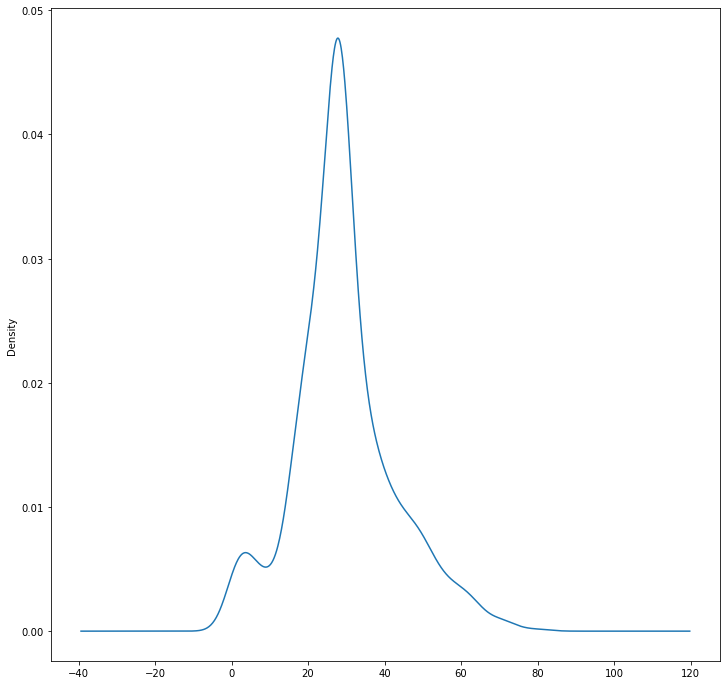

In [6]:
data_set.Age.plot.kde()

## Encoding Categorical Variables

In [7]:
df_encoded = pd.get_dummies(data_set, columns=categorical_variables)

df_encoded.loc[df_encoded.Sex == 'male', 'Sex'] = 1
df_encoded.loc[df_encoded.Sex == 'female', 'Sex'] = 0

df_encoded.Survived = data_set.Survived.astype('category')

df_encoded.head(5)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


## Scaling

As of the nature of the models that will be implemented, numerical data will be preprocessed using a Robust Scaler from Scikit-learn

In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(df_encoded[numerical_variables])

df_encoded[numerical_variables] = scaler.transform(df_encoded[numerical_variables])

df_encoded = df_encoded.drop(columns=['PassengerId', 'Name', 'Fare', 'Cabin', 'Ticket'])
df_encoded.head(5)

,Survived,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,-0.461538,1.0,0.0,0,0,1,0,0,1
1,1,0,0.769231,1.0,0.0,1,0,0,1,0,0
2,1,0,-0.153846,0.0,0.0,0,0,1,0,0,1
3,1,0,0.538462,1.0,0.0,0,0,1,1,0,0
4,0,1,0.538462,0.0,0.0,0,0,1,0,0,1


In [9]:
df_encoded.to_pickle('./train_processed.pkl')